# This is my NPS Project for DS1.1 : Andrey Novichkov

I am going to explore the 2017 survey dataset for makeschool's appacademy and see if I find anything intersting

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('input_data/2017/student_feedback_surveys.csv')

df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


# First question that I want to ask is: What is the overall NPS rating

This will help us understand how good the school did across all the locations and tracks

I want to get the problem down to this formula:  NPS = (Promoters - Detractors) / (Promoters + Passives + Detractors)

# But first let's clean the data up a little bit

In [6]:
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


In [7]:
df['Rating (Num)'].value_counts()

8          392
9          384
10         376
7          177
6           59
5           35
4           13
3            8
#ERROR!      3
0            2
1            2
2            2
Name: Rating (Num), dtype: int64

In [8]:
# Get rid of the #ERROR! values
df = df[df['Rating (Num)'] != '#ERROR!']
df['Rating (Num)'].value_counts()

8     392
9     384
10    376
7     177
6      59
5      35
4      13
3       8
0       2
1       2
2       2
Name: Rating (Num), dtype: int64

In [9]:
df['Rating (Num)'].dtypes

dtype('O')

In [10]:
# Convert the rating column to ints
df['Rating (Num)'] = df['Rating (Num)'].astype('int64')
df['Rating (Num)'].dtypes

dtype('int64')

In [11]:
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


In [12]:
df.rename(columns={'Rating (Num)': 'Rating'}, inplace=True)
df.head()

,ID,Location,Track,Week,Rating,Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


# Now back to it... 

In [15]:
df.head()

,ID,Location,Track,Week,Rating,Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


In [16]:
df['Type'] = 'Detractor'
df.loc[df['Rating'] >= 9, 'Type'] = 'Promoter'
df.loc[(df['Rating'] >= 7) & (df['Rating'] <= 8), 'Type'] = 'Passive'
df.loc[df['Rating'] <= 6, 'Type'] = 'Detractor'
df.head()

,ID,Location,Track,Week,Rating,Schedule Pacing,Type
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,Detractor
1,36,Los Angeles,Apps,Week 1,4,A little too fast,Detractor
2,117,San Francisco,Games,Week 1,4,Way too slow,Detractor
3,253,NaN,NaN,Week 2,4,A little too fast,Detractor
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,Detractor


In [19]:
num_promoter = len(df[df['Type'] == 'Promoter'])
num_passive = len(df[df['Type'] == 'Passive'])
num_detractor = len(df[df['Type'] == 'Detractor'])

def print_nps_stats(n_pro, n_pass, n_det):
    print("# promoters: {}".format(n_pro))
    print("# Passive: {}".format(n_pass))
    print("# Detractors: {}".format(n_det))

print_nps_stats(num_promoter, num_passive, num_detractor)

# promoters: 760
# Passive: 569
# Detractors: 121


In [20]:
def get_NPS(n_pro, n_pass, n_det):
    return round((n_pro - n_det) / (n_pro + n_pass + n_det) * 100, 2)

print('NPS for 2017 data: {}'.format(get_NPS(num_promoters, num_passive, num_detractors)))

NameError: name 'num_promoters' is not defined

# Drawing conclusions

So overall NPS value is 44.07, which is pretty good

# Going forward

I wanted to find out the NPS by city, to see which city was performing the best

In [21]:
df.head()

,ID,Location,Track,Week,Rating,Schedule Pacing,Type
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,Detractor
1,36,Los Angeles,Apps,Week 1,4,A little too fast,Detractor
2,117,San Francisco,Games,Week 1,4,Way too slow,Detractor
3,253,NaN,NaN,Week 2,4,A little too fast,Detractor
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,Detractor


In [22]:
nps_city_group = df.groupby('Location')['Type'].value_counts().unstack()
nps_city_group.fillna(0, inplace=True)
nps_city_group

Type,Detractor,Passive,Promoter
Location,,,
Atlanta,0.0,9.0,24.0
Beijing,0.0,25.0,53.0
Chicago,4.0,29.0,37.0
Hong Kong,3.0,7.0,1.0
Los Angeles,5.0,33.0,68.0
New York City,35.0,136.0,159.0
Oakland,2.0,18.0,27.0
Redwood City,5.0,23.0,30.0
San Francisco,31.0,135.0,194.0


In [23]:
nps_city_group['NPS'] = get_NPS(nps_city_group['Promoter'], nps_city_group['Passive'], nps_city_group['Detractor'])

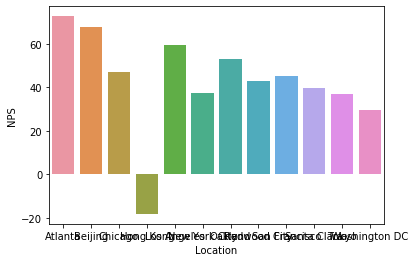

In [33]:
sns.barplot(x=nps_city_group.index, y=nps_city_group['NPS'])

<BarContainer object of 12 artists>

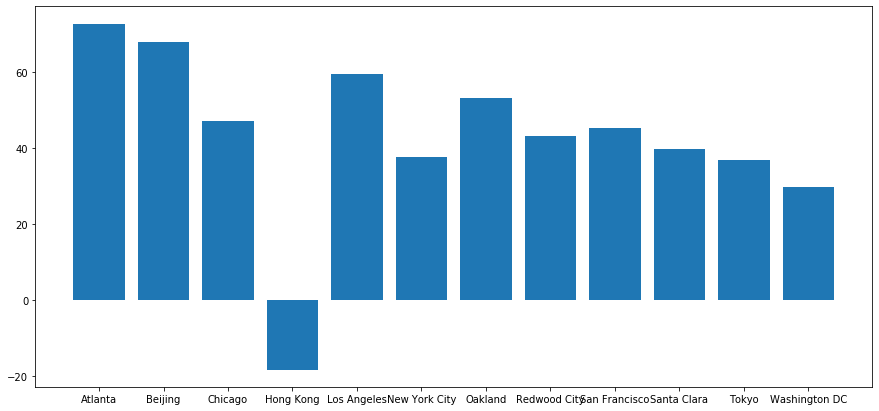

In [32]:
plt.figure(figsize=(15,7))
plt.bar(nps_city_group.index, nps_city_group['NPS'])

In [408]:
nps_by_city_json = {'City': list(nps_city_group.index), 'NPS': list(nps_city_group['NPS'])}

In [409]:
nps_by_city = pd.DataFrame().from_dict(nps_by_city_json)

In [410]:
nps_by_city = nps_by_city.sort_values(by='NPS', ascending=False)

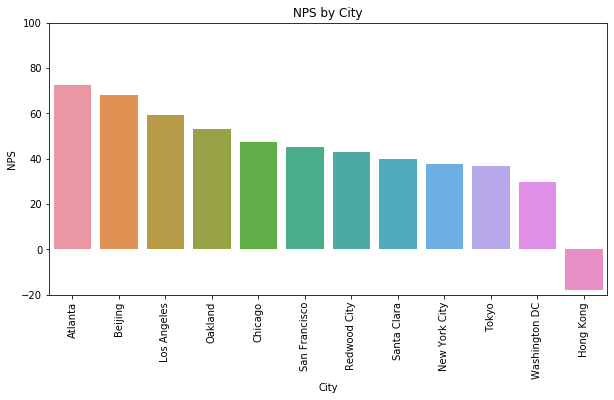

In [411]:
plt.figure(figsize=(10,5))
chart = sns.barplot(x='City', y='NPS', data=nps_by_city)
chart.set(ylim=(-20,100))
chart.set_title('NPS by City')
_= chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

# Drawing conclusions

As you can see, Atlanta had the best NPS while Hong Kong had a very low one, we will investigate that later

# Going forward

Next, I decided to try to get the NPS by track, very similarly to how I got it for city

In [412]:
df.head()

,ID,Location,Track,Week,Rating,Schedule Pacing,Type
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,Detractor
1,36,Los Angeles,Apps,Week 1,4,A little too fast,Detractor
2,117,San Francisco,Games,Week 1,4,Way too slow,Detractor
3,253,NaN,NaN,Week 2,4,A little too fast,Detractor
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,Detractor


In [413]:
nps_track_group = df.groupby('Track')['Type'].value_counts().unstack()
nps_track_group.fillna(0, inplace=True)
nps_track_group

Type,Detractor,Passive,Promoter
Track,,,
Apps,78.0,355.0,438.0
"Apps, Explorer",24.0,109.0,91.0
Games,9.0,66.0,133.0
"Games, Explorer",0.0,12.0,31.0
VR,2.0,12.0,46.0


In [414]:
nps_track_group['NPS'] = get_NPS(nps_track_group['Promoter'], nps_track_group['Passive'], nps_track_group['Detractor'])

In [415]:
nps_track_group

Type,Detractor,Passive,Promoter,NPS
Track,,,,
Apps,78.0,355.0,438.0,41.33
"Apps, Explorer",24.0,109.0,91.0,29.91
Games,9.0,66.0,133.0,59.62
"Games, Explorer",0.0,12.0,31.0,72.09
VR,2.0,12.0,46.0,73.33


In [416]:
nps_by_track_json = {'Track': list(nps_track_group.index), 'NPS': list(nps_track_group['NPS'])}

In [417]:
nps_by_track = pd.DataFrame().from_dict(nps_by_track_json)

In [418]:
nps_by_track = nps_by_track.sort_values(by='NPS', ascending=False)

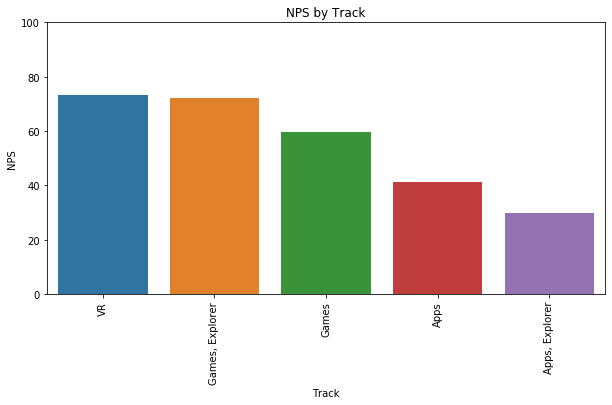

In [419]:
plt.figure(figsize=(10,5))
chart = sns.barplot(x='Track', y='NPS', data=nps_by_track)
chart.set(ylim=(0,100))
chart.set_title("NPS by Track")
_= chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

# Drawing conclusions

As you can see, VR had the best NPS, while the App category was in last place

# Going Forward

I decided to take a deeper look at this and see how many people are in each track

In [420]:
df.head()

,ID,Location,Track,Week,Rating,Schedule Pacing,Type
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,Detractor
1,36,Los Angeles,Apps,Week 1,4,A little too fast,Detractor
2,117,San Francisco,Games,Week 1,4,Way too slow,Detractor
3,253,NaN,NaN,Week 2,4,A little too fast,Detractor
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,Detractor


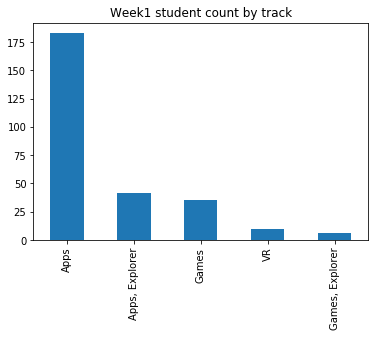

In [421]:
tracks = df[df['Week'] == 'Week 1']
tracks = tracks[['Track']]
_= tracks['Track'].value_counts().plot(kind='bar', title="Week1 student count by track")

# Drawing conclusions

Looking at this graph and the NPS per track data, it looks like maybe it is a good idea for Make School to promote more VR and Games, as they have the highest NPS values but less people choosing that track

# Going forward
I then decided to figure out which track had the best promoter to detractor ratio, which excludes the passive group. This will let me see which track had the most amount of love and least amount of hate!

In [422]:
df.head()

,ID,Location,Track,Week,Rating,Schedule Pacing,Type
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,Detractor
1,36,Los Angeles,Apps,Week 1,4,A little too fast,Detractor
2,117,San Francisco,Games,Week 1,4,Way too slow,Detractor
3,253,NaN,NaN,Week 2,4,A little too fast,Detractor
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,Detractor


In [423]:
nps_track_group = df.groupby('Track')['Type'].value_counts().unstack()
nps_track_group.fillna(0, inplace=True)
nps_track_group

Type,Detractor,Passive,Promoter
Track,,,
Apps,78.0,355.0,438.0
"Apps, Explorer",24.0,109.0,91.0
Games,9.0,66.0,133.0
"Games, Explorer",0.0,12.0,31.0
VR,2.0,12.0,46.0


In [424]:
nps_track_group['p_2_d_ratio'] = nps_track_group['Promoter'] / (nps_track_group['Promoter'] + nps_track_group['Detractor']) * 100
nps_track_group

Type,Detractor,Passive,Promoter,p_2_d_ratio
Track,,,,
Apps,78.0,355.0,438.0,84.883721
"Apps, Explorer",24.0,109.0,91.0,79.130435
Games,9.0,66.0,133.0,93.661972
"Games, Explorer",0.0,12.0,31.0,100.000000
VR,2.0,12.0,46.0,95.833333


In [425]:
p2d_by_track_json = {'Track': list(nps_track_group.index), 'P2D_ratio (%)': list(nps_track_group['p_2_d_ratio'])}

In [426]:
p2d_by_track_df = pd.DataFrame().from_dict(p2d_by_track_json)

In [427]:
p2d_by_track_df = p2d_by_track_df.sort_values(by='P2D_ratio (%)', ascending=False)

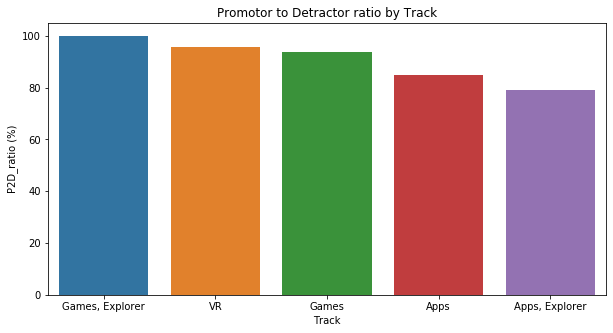

In [428]:
plt.figure(figsize=(10,5))
_= sns.barplot(x='Track', y='P2D_ratio (%)', data=p2d_by_track_df).set_title("Promotor to Detractor ratio by Track")

# Drawing conclusions

As you can see, Games Explorer came in First place even though VR had the best NPS, but Apps still were in the last 2 places

# Going forward

I then wanted to see if students enjoyed their academy experiance at the same level as time went along

In [40]:
df.head()

,ID,Location,Track,Week,Rating,Schedule Pacing,Type
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,Detractor
1,36,Los Angeles,Apps,Week 1,4,A little too fast,Detractor
2,117,San Francisco,Games,Week 1,4,Way too slow,Detractor
3,253,NaN,NaN,Week 2,4,A little too fast,Detractor
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,Detractor


In [43]:
rat_by_week = df.sort_values('Week')
rat_by_week = rat_by_week[['Week', 'Rating']]
rat_by_week.head()

,Week,Rating
0,Week 1,3
254,Week 1,8
253,Week 1,8
252,Week 1,8
251,Week 1,8


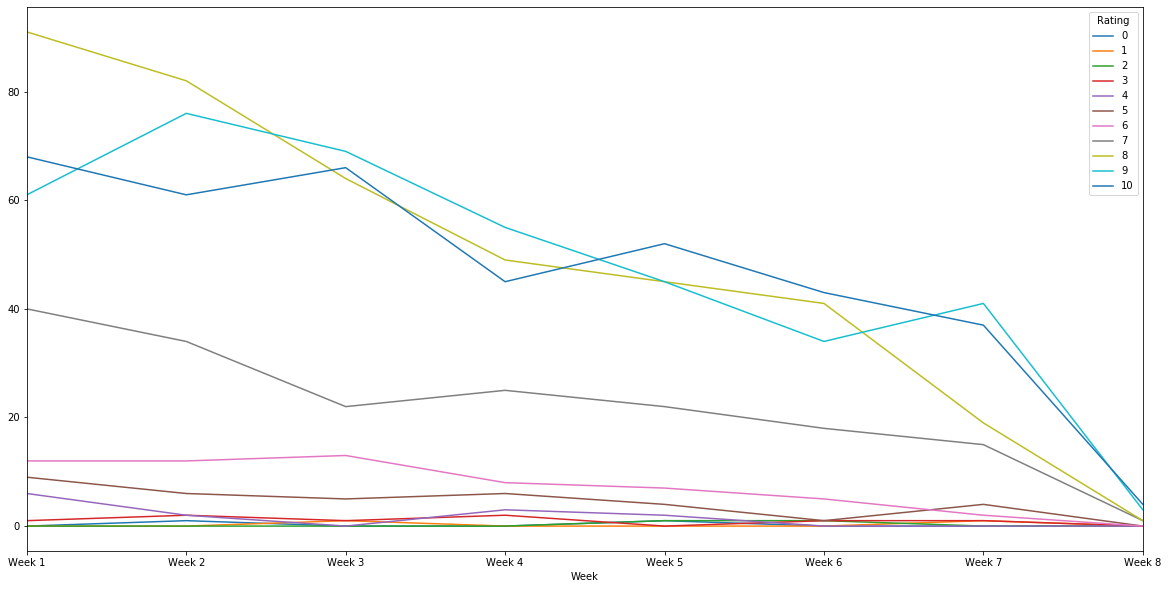

In [64]:
fig, ax = plt.subplots(figsize=(20, 10))
rat_by_week.groupby(['Week'])['Rating'].value_counts().unstack().fillna(0).plot(ax=ax)

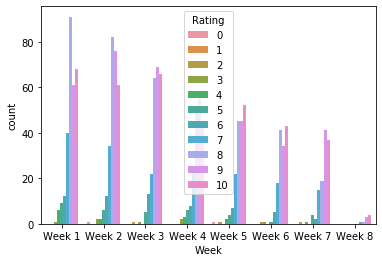

In [49]:
sns.countplot(x='Week', hue="Rating", data=rat_by_week)

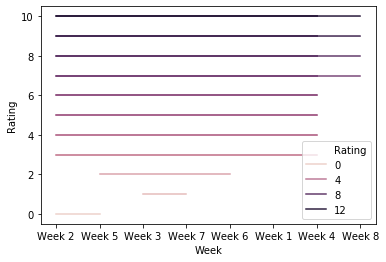

In [55]:
sns.lineplot(x='Week', y="Rating", hue="Rating", data=rat_by_week)

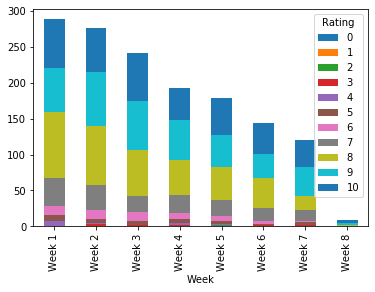

In [44]:
rat_by_week.groupby('Week')['Rating'].value_counts().unstack().plot(kind='bar', stacked=True)

In [45]:
rat_by_week_group = rat_by_week.groupby('Week')['Rating'].value_counts().unstack()

In [46]:
rat_by_week_group = rat_by_week_group.fillna(0)
rat_by_week_group

Rating,0,1,2,3,4,5,6,7,8,9,10
Week,,,,,,,,,,,
Week 1,0.0,0.0,0.0,1.0,6.0,9.0,12.0,40.0,91.0,61.0,68.0
Week 2,1.0,0.0,0.0,2.0,2.0,6.0,12.0,34.0,82.0,76.0,61.0
Week 3,0.0,1.0,0.0,1.0,0.0,5.0,13.0,22.0,64.0,69.0,66.0
Week 4,0.0,0.0,0.0,2.0,3.0,6.0,8.0,25.0,49.0,55.0,45.0
Week 5,1.0,0.0,1.0,0.0,2.0,4.0,7.0,22.0,45.0,45.0,52.0
Week 6,0.0,0.0,1.0,1.0,0.0,1.0,5.0,18.0,41.0,34.0,43.0
Week 7,0.0,1.0,0.0,1.0,0.0,4.0,2.0,15.0,19.0,41.0,37.0
Week 8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,4.0


In [47]:
rat_by_week_group = rat_by_week_group.sort_values(axis=1)

TypeError: sort_values() missing 1 required positional argument: 'by'

# Drawing conclusions

As you can see, ratings went in most cases as the weeks rolled by

# Going forward

Wanted to try to figure out if there is anything else that is interesting about the data

# Let's take a look at Hong Kong, since it had a very small NPS compared to everyone else

In [433]:
hk_df = df[df['Location'] == 'Hong Kong']

In [434]:
hk_df

,ID,Location,Track,Week,Rating,Schedule Pacing,Type
520,550,Hong Kong,"Apps, Explorer",Week 1,7,A little too fast,Passive
521,551,Hong Kong,"Apps, Explorer",Week 1,8,Just right,Passive
522,552,Hong Kong,"Apps, Explorer",Week 1,7,A little too fast,Passive
523,553,Hong Kong,"Apps, Explorer",Week 1,5,Just right,Detractor
524,554,Hong Kong,Apps,Week 1,9,A little too slow,Promoter
525,555,Hong Kong,"Apps, Explorer",Week 1,7,Just right,Passive
727,765,Hong Kong,"Apps, Explorer",Week 2,6,A little too slow,Detractor
729,767,Hong Kong,"Apps, Explorer",Week 2,8,A little too fast,Passive
735,773,Hong Kong,"Apps, Explorer",Week 2,8,A little too fast,Passive
752,790,Hong Kong,"Apps, Explorer",Week 2,6,A little too fast,Detractor


# Drawing conclusions

Turns out the hong kong data is corrupt, as it only has up till week 2, and doesnt seem to have a lot of people. Therefore, we should just disregard this data point

# Let's take a closer look at the Detractors and how they responded to schedule pacing

In [435]:
df.head()

,ID,Location,Track,Week,Rating,Schedule Pacing,Type
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,Detractor
1,36,Los Angeles,Apps,Week 1,4,A little too fast,Detractor
2,117,San Francisco,Games,Week 1,4,Way too slow,Detractor
3,253,NaN,NaN,Week 2,4,A little too fast,Detractor
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,Detractor


In [436]:
# For week 1
week = df[df['Week'] == 'Week 1']
d_df = week[week['Type'] == 'Detractor']
d_df['Schedule Pacing'].value_counts()/len(d_df)*100

Just right           35.714286
A little too slow    32.142857
A little too fast    21.428571
Way too fast          7.142857
Way too slow          3.571429
Name: Schedule Pacing, dtype: float64

In [437]:
# For week 2
week = df[df['Week'] == 'Week 2']
d_df = week[week['Type'] == 'Detractor']
d_df['Schedule Pacing'].value_counts()/len(d_df)*100

Just right           52.173913
A little too fast    26.086957
Way too fast         17.391304
A little too slow     4.347826
Name: Schedule Pacing, dtype: float64

In [438]:
# For week 3
week = df[df['Week'] == 'Week 3']
d_df = week[week['Type'] == 'Detractor']
d_df['Schedule Pacing'].value_counts()/len(d_df)*100

Just right           45.0
A little too slow    25.0
A little too fast    15.0
Way too fast         10.0
Way too slow          5.0
Name: Schedule Pacing, dtype: float64

In [439]:
# For week 4
week = df[df['Week'] == 'Week 4']
d_df = week[week['Type'] == 'Detractor']
d_df['Schedule Pacing'].value_counts()/len(d_df)*100

Just right           57.894737
A little too fast    36.842105
A little too slow     5.263158
Name: Schedule Pacing, dtype: float64

# Drawing conclusions

Looks like in week 1 a lot of the detractors thought the course was either a little too slow or a little too fast.
Since those are opposites, that might be hard to fix

# Going forward

Let's see which location had the most students

In [440]:
df.head()

,ID,Location,Track,Week,Rating,Schedule Pacing,Type
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,Detractor
1,36,Los Angeles,Apps,Week 1,4,A little too fast,Detractor
2,117,San Francisco,Games,Week 1,4,Way too slow,Detractor
3,253,NaN,NaN,Week 2,4,A little too fast,Detractor
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,Detractor


In [441]:
week1 = df[df['Week'] == 'Week 1']

In [442]:
week1['Location'].value_counts()

San Francisco    63
New York City    54
Beijing          37
Santa Clara      29
Tokyo            27
Los Angeles      14
Washington DC    13
Chicago          10
Redwood City     10
Atlanta           7
Oakland           6
Hong Kong         6
Name: Location, dtype: int64

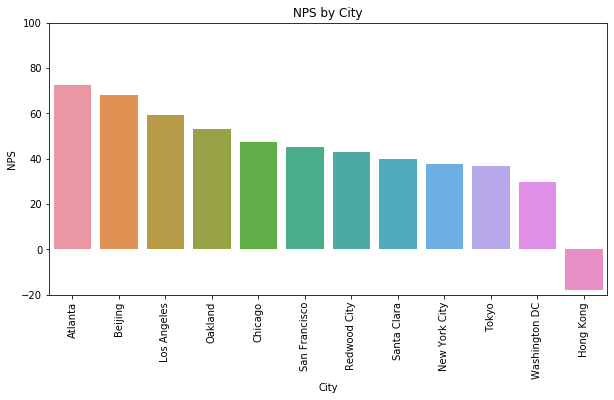

In [443]:
plt.figure(figsize=(10,5))
chart = sns.barplot(x='City', y='NPS', data=nps_by_city)
chart.set(ylim=(-20,100))
chart.set_title('NPS by City')
_= chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

# Drawing conclusions

Because Atlanta had only 7 people, looks like Beijing and San Francisco are the two values that have high NPS and high student attendance

# Thank you for your attention